# BLOQ 1: LIBRARIES AND INITIAL STATE

In [2]:
# import libraries to use 

import pygame 
import numpy as np
from itertools import combinations
import math
from scipy import constants as cte

# set number of particles 

n_particless = 200
# create array r0 that will store the particles initial positions : 
# - File 0 and 1 represent x and y position respectively
# - Each column represent a diferent particle 

r0 = np.zeros((2,n_particless))


# r0 recieves the position values for each particle from a gaussian distribution with mean = 300 and dev = 90 

for i in range(0,n_particless):
    
    r0[0,i] = np.random.normal(300,90)
    r0[1,i] = np.random.normal(300,90)
    
    r0[0,i] = np.abs(r0[0,i]) 
    r0[1,i] = np.abs(r0[1,i])  
    
    # the values that are greater than 500 and smaller than 100 are rejected 
    # a new value is assigned until it is in the range : 100 < x < 500
    
    while r0[1,i] > 500 :
        r0[1,i] = np.random.normal(300,90) 
        
    while r0[0,i] > 500 :
        r0[0,i] = np.random.normal(300,90) 
    
    while r0[1,i] < 100 :
        r0[1,i] = np.random.normal(300,90) 
        
    while r0[0,i] < 100 :
        r0[0,i] = np.random.normal(300,90)

        
        
# create array v0 that will store the particles initial velocities 
# - File 0 and 1 represent x and y velocities respectively
# - Each column represent a diferent particle        

v0 = np.zeros((2,n_particless))  

# v0 recieves the velocitie values for each particle from an uniform distribution with values between -10 and 10

for i in range(0,n_particless):

    
    v0[0,i] = np.random.uniform(-10,10)
    v0[1,i] = np.random.uniform(-10,10)

    
# array with the index of the particles     

ids = np.arange(n_particless)


# array with pairs of comnbinations between the index of the particles 
pares_id = np.asarray(list(combinations(ids,2)))

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


# bloq 2 : functions and time evolution of the initial state 

In [1]:

# functions for particle colision detection : 

def get_delta_pairs(x):
    
    ''' Returns the diference between to points in the x or y direcction '''
    
    return np.diff(np.asarray(list(combinations(x,2))), axis=1).ravel()

def get_deltad_pairs(r) :
    
    '''Using the get_delta_pairs function returns the diference in position of two 2d points ,
       acording to the distance between points formula '''
    
    return np.sqrt(get_delta_pairs(r[0])**2 + get_delta_pairs(r[1])**2)


# function for change in velocity : 

def compute_new_v(v1, v2,r1,r2,d):
    
    ''' Returns the new velocities after a colision between two particles 
        acording to the treathment of elastic colision of 2d spheres '''
    
    
    # if r1 - r2 or r2 -r1 are equal to 0 ===> r1 - r2 or r2 -r1  = distance of colision 
   
    dist_c = np.array([[d * math.cos(angulo_i(vx,vy))],[d]])
    length = r1.shape[1]
    
    for i in range(0,length):
        if not (r1[:,i]-r2[:,i]).all():
            r1[:,i]-r2[:,i] == dist_c
            
        if not ( r2[:,i]-r1[:,i]).all():
            r2[:,i]-r1[:,i] == dist_c    
         
        else: 
            continue 
    
    
    
    fact_1 =  np.diag((v1-v2).T @ (r1-r2)) /np.sum((r1-r2)**2, axis=0) * (r1-r2)  

    fact_1 = np.nan_to_num(fact_1,0)

    fact_2 = np.diag((v2-v1).T @ (r2-r1)) /np.sum((r2-r1)**2, axis=0) * (r2-r1)

    fact_2 =  np.nan_to_num(fact_2,0)

    v1new = v1 - fact_1
    v2new = v2 - fact_2
    
    
    return v1new, v2new


# function for the borders interaction 

def vi_T(T,N,m):
    
    ''' Returns the velocity related to a temperature T of a particle of mass m in a system 
        of n particles 
        
        Is escaled to nm per micro sec                                    
        
        '''
    
    vi = math.sqrt((2*(cte.Boltzmann)*T)/(m)) * (1/1e2)
    return vi 


def angulo_i(vx,vy):
    
    ''' return the angle of direcction of the vector with componets vx and vy '''
    
    #  loop that iterates trough the array that contains the velocities of the selected particles 
    #  that colide
    
    a = np.zeros((1,vx.shape[0]))
    
    for i in range(0,vx.shape[0]):
    
        # obtain angles between : 0 <= alpha < pi/2
    
        if vy[i] >= 0 and vx[i] > 0 :
            
            a[0,i] = math.atan((vy[i]/vx[i]))
            
            
        # obtain angle : alpha = pi/2        
        
        elif vx[i] == 0 and vy[i] > 0 :
            
            a[0,i] = (math.pi) / 2
                
        # obtain angle between : pi/2 < alpha < pi 
        
        elif vx[i] < 0 and vy[i]  >0 :
        
            a[0,i] = math.pi + math.atan((vy[i]/vx[i]))
            
        # obtain angle : alpha = pi      
        
        elif vy[i] == 0 and vx[i] < 0:
            
            a[0,i] = math.pi 
        
        
        # obtain angle between : pi < alpha < 3 pi/2     
               
        elif vx[i] < 0 and vy[i]  < 0 :
        
            a[0,i] =  math.atan((vy[i]/vx[i])) +  math.pi 
         
            
        # obtain angle : alpha = 3 pi/2        
        
        elif vx[i] == 0 and vy[i] < 0 :
        
            a[0,i] = (3 * math.pi) / 2
        
                 
        # obtain angle between : 3 pi/2  < alpha < 2pi     
               
        elif vx[i] > 0 and vy[i]  < 0 :
            
            a[0,i] = math.atan((vy[i]/vx[i]))
        
    return a     



class particles:
    
    # Class with the atributes and methods for evolving a set of particles of equal radius and mass acording to certain rules'''
    
    
    
    def __init__(self, r0 ,v0, rad , m ):
        
    #    Define atributes of the class: 
    
    #    - initial positions : r0 : 2d array where each column represents a diferent particle 
    #    - initial velocities : v0 : 2d array where each column represents a diferent particle
    #    - radius of the particles : rad 
    #    - mass of the particles : m                            '''    
        
        
        self.r0 = r0
        self.v0 = v0 
        self.rad = rad 
        self.mass = m 
        
    def time_evolution(self, id_pairs, ts, dt,d_cutoff):
        
        
        # Funtion that evolves the set of particles acording to certain rules :
        
        #    RULES : 
        #    1.) The particles are 2d circles that have elastic colisions and dont interact with each others
        #    2.) The set of particles is confined in a two dimentional square where if they aproximate the borders 
        #        they specularly reflect and aquire a module velocity acording to the Temp of the border by the asumption
        #        that the module of the velocity is the one related to kinetic energy asociated to that temperature
        #    3.) As there are no interactions the eq of motion for each particle is : r = r0 + v*dt
            
        #    Input :
            
        #   - Atributes of the set of particels such as initial position or velocity ,etc 
        #   - dt : interval of time , in order to have physical coherence dt = 1 is equivalent to 1 micro sec 
        #   - ts : total iteration of time 
        #   - d_cutoff : distance where a particle colision happens
        #   - id_pairs: array with the combination of the index of the particles 
            
        #   Output : 
        #   - Returns a 3d array where the 2 of the axis are the position in x and y as a function of time and the third one is the time called rs
        #   - Returns a 3d array where the 2 of the axis are the velocities in x and y as a function of time and the third one is the time called vs    
            
      
            

        # rs and vs are arrays with the dimensions of r and v and a third dimension (depth) = ts 
    
        rs = np.zeros((ts, self.r0.shape[0], self.r0.shape[1]))
        vs = np.zeros((ts, self.v0.shape[0], self.v0.shape[1]))
    
    
        # Initial State
        # rs copies the values of r (initial positions) on the firs time axis index
        # vs copies the values of v (initial positions) on the firs time axis index
        
        
        rs[0] = self.r0.copy()        
        vs[0] = self.v0.copy()        
    
     
        # loop that iterates for each time value   
        
        for i in range(1,ts):
            
        # 1.particle colision interaction:
             
            # stores the index of the pair of particles that colide 
    
            ic = id_pairs[get_deltad_pairs(self.r0) < d_cutoff]    
    
            # changes the velocities of the particles that collide by using the function compute_new_v 
    
            self.v0[:,ic[:,0]], self.v0[:,ic[:,1]] = compute_new_v(self.v0[:,ic[:,0]], self.v0[:,ic[:,1]],self.r0[:,ic[:,0]], self.r0[:,ic[:,1]] , d_cutoff )
        
        
            
        # 2.border interaction : 
    
   
            # particulas en rx y ry mayor a 500 interact with a border
            # particulas en rx y ry menor a 100 interact with a border                      
            # change the velocities aquiring velocity acording to the border temp and  with especular reflexion
            
            # rigth wall 
            
            self.v0[0,self.r0[0] >= 500] =  vi_T(500,n_particless,self.mass) * (-1)* np.cos(angulo_i(vx = self.v0[0,self.r0[0]>=500], vy =self.v0[1,self.r0[0]>=500]))    
            self.v0[1,self.r0[0] >= 500] =  vi_T(500,n_particless,self.mass) *  np.sin(angulo_i(vx = self.v0[0,self.r0[0]>=500],vy = self.v0[1,self.r0[0]>=500]))       
            
            # left wall
            
            self.v0[0,self.r0[0]==100] = vi_T(500,n_particless,self.mass) * (-1) * np.cos(angulo_i(vx = self.v0[0,self.r0[0]==100],vy = self.v0[1,self.r0[0]==100])) 
            self.v0[1,self.r0[0]==100] = vi_T(500,n_particless,self.mass) * np.sin(angulo_i(vx = self.v0[0,self.r0[0]==100],vy = self.v0[1,self.r0[0]==100]))  
            
            # lower wall
            
            self.v0[0,self.r0[1]==500] = vi_T(500,n_particless,self.mass) * np.cos(angulo_i(vx = self.v0[0,self.r0[1]==500],vy = self.v0[1,self.r0[1]==500]))
            self.v0[1,self.r0[1]==500] = vi_T(500,n_particless,self.mass) * (-1) * np.sin(angulo_i(vx = self.v0[0,self.r0[1]==500],vy = self.v0[1,self.r0[1]==500])) 
            
            
            # upper wall 
            
            self.v0[0,self.r0[1]==100] = vi_T(500,n_particless,self.mass) * np.cos(angulo_i(vx = self.v0[0,self.r0[1]==100],vy = self.v0[1,self.r0[1]==100]))  
            self.v0[1,self.r0[1]==100] = vi_T(500,n_particless,self.mass) * (-1) * np.sin(angulo_i(vx = self.v0[0,self.r0[1]==100],vy = self.v0[1,self.r0[1]==100]))
            

           
            
        #3.eq of motion
            
            self.r0 = self.r0 + self.v0 * dt 
            
            
        #4.retain particles at the border  
            
            self.r0[0,self.r0[0]>500] = 500
            self.r0[0,self.r0[0]<100] = 100 
            self.r0[1,self.r0[1]>500] = 500
            self.r0[1,self.r0[1]<100] = 100
            
            # stores in i index of the time axis of rs and vs the respective values of the positions and velocites 
            # after the evolution of the system 
            
            rs[i] = self.r0.copy()
            vs[i] = self.v0.copy()
            
        return rs, vs 
            

# set the total time iterations         

ts = 5000
# creat the set of particels 

set_of_particles = particles(r0,v0,rad = 2 , m = 1.67*1e-27 )

# apply time evolution function of the particles class 

rs , vs = set_of_particles.time_evolution(pares_id , ts , dt = 0.125 , d_cutoff = 2)

# print READY when the iterations are done 

print('READY')

NameError: name 'r0' is not defined

# BLOQ 3: pygame colisions plot 

In [36]:
# initialize pygame librarie

pygame.init()      
        
#tamano ventana 

size = (600,600)

# definir colores en rgb :

WHITE = (255,255,255)
BLACK = (0,0,0)
RED = (255,0,0)

# mass of the particels , for color purposes 
m = 10


def color_energy(vx , vy ):
    
    ''' Returns a tuple with the rgb numbers for a color acording to the kinectic energy
        related to vx and vy , where if there is more eneregy the color must be more red 
        and more blue on the contrary case '''
    
    
    K = (1/2)*((vx**2) + (vy**2))*m
    
    
    red = K/9
    green = 255-3*K/5
    blue = 255 - K/20
    
    if blue < 0:
        blue = 0
        
    if blue > 250:
        blue = 250
        
    if red > 250:
        red = 250
    
    if red < 0:
        red = 0
        
    if green > 250:
        green = 250
    
    if green < 0:
        green = 0    
    
    return (red,green,blue)
     
        
        
        
clock = pygame.time.Clock() 

# crear ventana

screen = pygame.display.set_mode(size)

# crear el while loop que genera la animacion 

running = True
while running == True:
    
    # genera un nuevo plot del estado del sistema para cada valor de ts 
    
    for ts in range (0,4999):
        
        # asigna color de fondo a negro
        screen.fill(BLACK)
        
        
        # left wall 
        pygame.draw.line(screen,color_energy(20,20),[100,100],[100,500],2)    
        # upper wall
        pygame.draw.line(screen,color_energy(20,20),[100,100],[500,100],2)  
        # lower wall
        pygame.draw.line(screen,color_energy(20,20),[500,100],[500,500],2)    
        # rigth wall
        pygame.draw.line(screen,color_energy(20,20),[100,500],[500,500],2)     
        
        # plot the particles 
      
        for i in range (0,99):
            pygame.draw.circle (screen , color_energy(vs[ts,0,i] , vs[ts,1,i])   , [rs[ts,0,i],rs[ts,1,i]],2)
            
           
        # actualiza pantalla 
        pygame.display.flip()
        
        # sets the fps of the refresh 
        clock.tick_busy_loop(80) 
          



        
        # configura que cuado se cierre la app se detenga el loop   
        for event in pygame.event.get():   
            
            # Exiting the while loop
            if event.type == pygame.QUIT:      
                running = False        
                pygame.quit() 
        
    

error: display Surface quit

# BLOCK 4 : T vs time plot

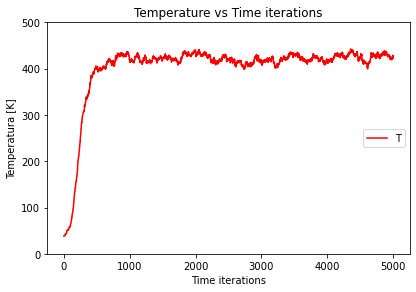

In [37]:

# import pyplot 

import matplotlib.pyplot as plt 


# define T as a function of the root mean square of the velocities 


m = 1.67*1e-27

def T_v_particles(v):
    
    ''' Temperature as a function of the root mean square of the velocities of a set of particles 
        acording to kinetic theory 
        
        Also return the average square velocity 
        
        '''
    
    vel = np.zeros((1,n_particless))
    
    for i in range(0,n_particless):
        vel[0,i] = math.sqrt((v[0,i])**2 + (v[1,i])**2 ) 
    
    vel_sqr = (vel * 1e2)**2 
    
    avg_vel_sqr = np.mean(vel_sqr,axis = 1)
    
    T = (m *  avg_vel_sqr )/ (2 * cte.Boltzmann) 
    
    return T , avg_vel_sqr


#   define an array of sise 1 x ts that will store the temperatures of the particles for each time iteration obtained from
#   the function time_evolution and an array that will store the average square velocity of each time iteration 

ts = 5000

T_t = np.zeros((1,ts))

avg_vel_sqr = np.zeros((1,ts))  

# store in the arrays its respectives values

for i in range(ts):
    T_t[0,i] , avg_vel_sqr [0,i] = T_v_particles(vs[i]) 



# array with the time intervals    
    
time = np.linspace(0,ts-1,ts) 

# Configure T vs t plot using matplotlib     
 
x = time 
y = T_t.ravel()

fig , ax = plt.subplots()

ax.set_xlabel('Time iterations')
ax.set_ylabel('Temperatura [K]')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylim(0,500)
fig.tight_layout()
plt.title('Temperature vs Time iterations')    
ax.plot(x,y , 'r')
plt.legend(['T'],loc ='center right') 

# BLOCK 5 : U vs time plot

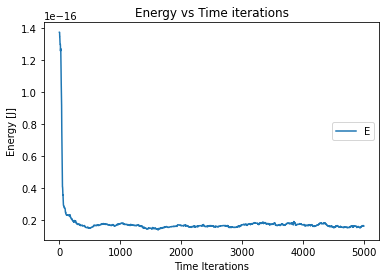

In [263]:

def U_system(v):
    
    ''' Returns the internal energy of the system from the sum of the kinetic energy of each particle ''' 
        
    # creates array with the module of the velocites of each particle     
        
    vel = np.zeros((1,n_particless))
    
    for i in range(0,n_particless):
        vel[0,i] = math.sqrt((v[0,i])**2 + (v[1,i])**2 ) 
    
    K = (1/2)* m * (vel*1e3)**2 
    
    U = np.sum(K,axis = 1 )
    
    return U


#   define array of sise 1 x ts that stores the energy of the system for each time iteration obtained from
#   the function time_evolution 

U_t = np.zeros((1,ts))

# store in the array its respectives values

for i in range(ts):
    U_t[0,i] = U_system(vs[i]) 

  

# array with the time intervals   
    
time = np.linspace(0,ts-1,ts)  


# Configure U vs t plot using matplotlib     
 
x = time 
y = U_t.ravel()

fig , ax = plt.subplots()

ax.set_ylabel('Energy [J]')
ax.set_xlabel('Time Iterations')
plt.title('Energy vs Time iterations')

ax.plot(x,y)
plt.legend(['E'],loc ='center right')
plt.show()



# BLOCK 6 : velocity distribution of the final state plot




















[423.1614717]


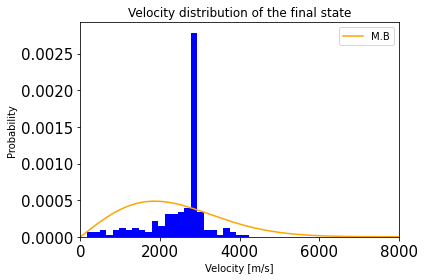

In [38]:


# plot the histogram with of the velocities of the final state and the maxwell 
# distribution with the temperature of the final state of the system 

# maxwell boltzmann distribution

v = np.linspace(0,10000,10001)
f_v2 = 1.5 * (m/(cte.Boltzmann*T_t[:,-1]))*v*np.exp(-(m/(cte.Boltzmann*T_t[:,-1]))*((v)**2 / 2))

# histogram + configure the plot

fig , ax = plt.subplots()

bins = np.linspace(0,8000,50) 

ax.hist(np.sqrt(np.sum((1e2*vs[-1])**2 , axis = 0)), bins = bins , density = True , color = 'b')

ax.plot(v , f_v2 , color = 'orange')
ax.set_xlabel('Velocity [m/s]')
ax.set_ylabel('Probability')
ax.set_xlim(0,8000)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.title('Velocity distribution of the final state')
plt.legend(['M.B'])
fig.tight_layout()
    
print(T_t[:,-1])
